# Airbnb Investment Project

## Data Sources and Justification

## Introduction
Two primary data sources were obtained for this project. First, we obtained detailed listing information of Airbnb for year 2017. Listing information includes but not limited to: price, location & neighborhood, reviews, host, availability, and other property characteristics (amenities, transit, neighborhood overview). The first dataset was obtained from “insideairbnb.com”. Second, real estate property values across all major neighborhoods in San Francisco for year 2017 was obtained. Median property prices in each neighborhood for various housing types are provided in this dataset. We obtained this dataset from “zillow.com/research/”.



## Description

About “insideairbnb.com”:
http://insideairbnb.com/about.html 
About “zillow.com/research/”:
https://www.zillow.com/research/about-us/ 

Both of our data resources are open, public, and authoritative resources that can be accessed for free online. In addition, those two datasets contain the exact information that our team required to conduct our analysis in this project. 

**Step by step procedures to download raw datasets from resources**

**Airbnb data:**
- Go to http://insideairbnb.com/get-the-data.html 
- Find the section “San Francisco, California, United States”
- Click “show archived data” at the bottom
- Download the “listings.csv.gz” file for 2017
- Extract the csv file

**Zillow data**
- Go to https://www.zillow.com/research/data/ 
- In “Home Value” section choose “ZHVI 2-Bedroom Time Series ($)” for Data Type and choose “Neighborhood” for - - ----- Geography (since we will only use 2-bed property type to conduct our analysis)
- Click Download


**Cleaning and normalizing raw data:**

The raw datasets we obtained are not in third normal form and contains information that we don’t necessarily required for the analysis.

**In Zillow dataset:**
- We deleted/filtered out all other cities besides San Francisco
- We delete all other monthly median property prices besides months within year 2017
- Our analysis only requires the yearly average property price of each neighborhood in San Francisco, instead of 12 monthly median property prices. Therefore, we calculated the average price by using the =AVERAGE() function in Excel and removed all 12 columns that contains monthly prices to make the table more efficient and to save storage space.
- The two datasets will be connected on neighborhood names. However, some neighborhood names are mismatched since those datasets are prepared by different authorities. For instance, in Zillow dataset, a neighborhood is listed as “Downtown” while in the same neighborhood is listed as “Downtown/Civic Center” in Airbnb dataset. Therefore, we manually revised those mismatches. 

**In Airbnb dataset:**
- We delete all columns that contain information that we don’t need. For instance, picture of the host would not be required for our analysis. Therefore, we removed column called “host_picture_url”
- The content of Airbnb dataset was broken into smaller tables (explained in detail in our data model section) in order to normalize the data. The calendar, host, neighborhood, price, property, review, room, and transit tables were connected to our major table named listing using queries in SQL (explained in detail in SQL files). 


## Entity Relationship Diagram 
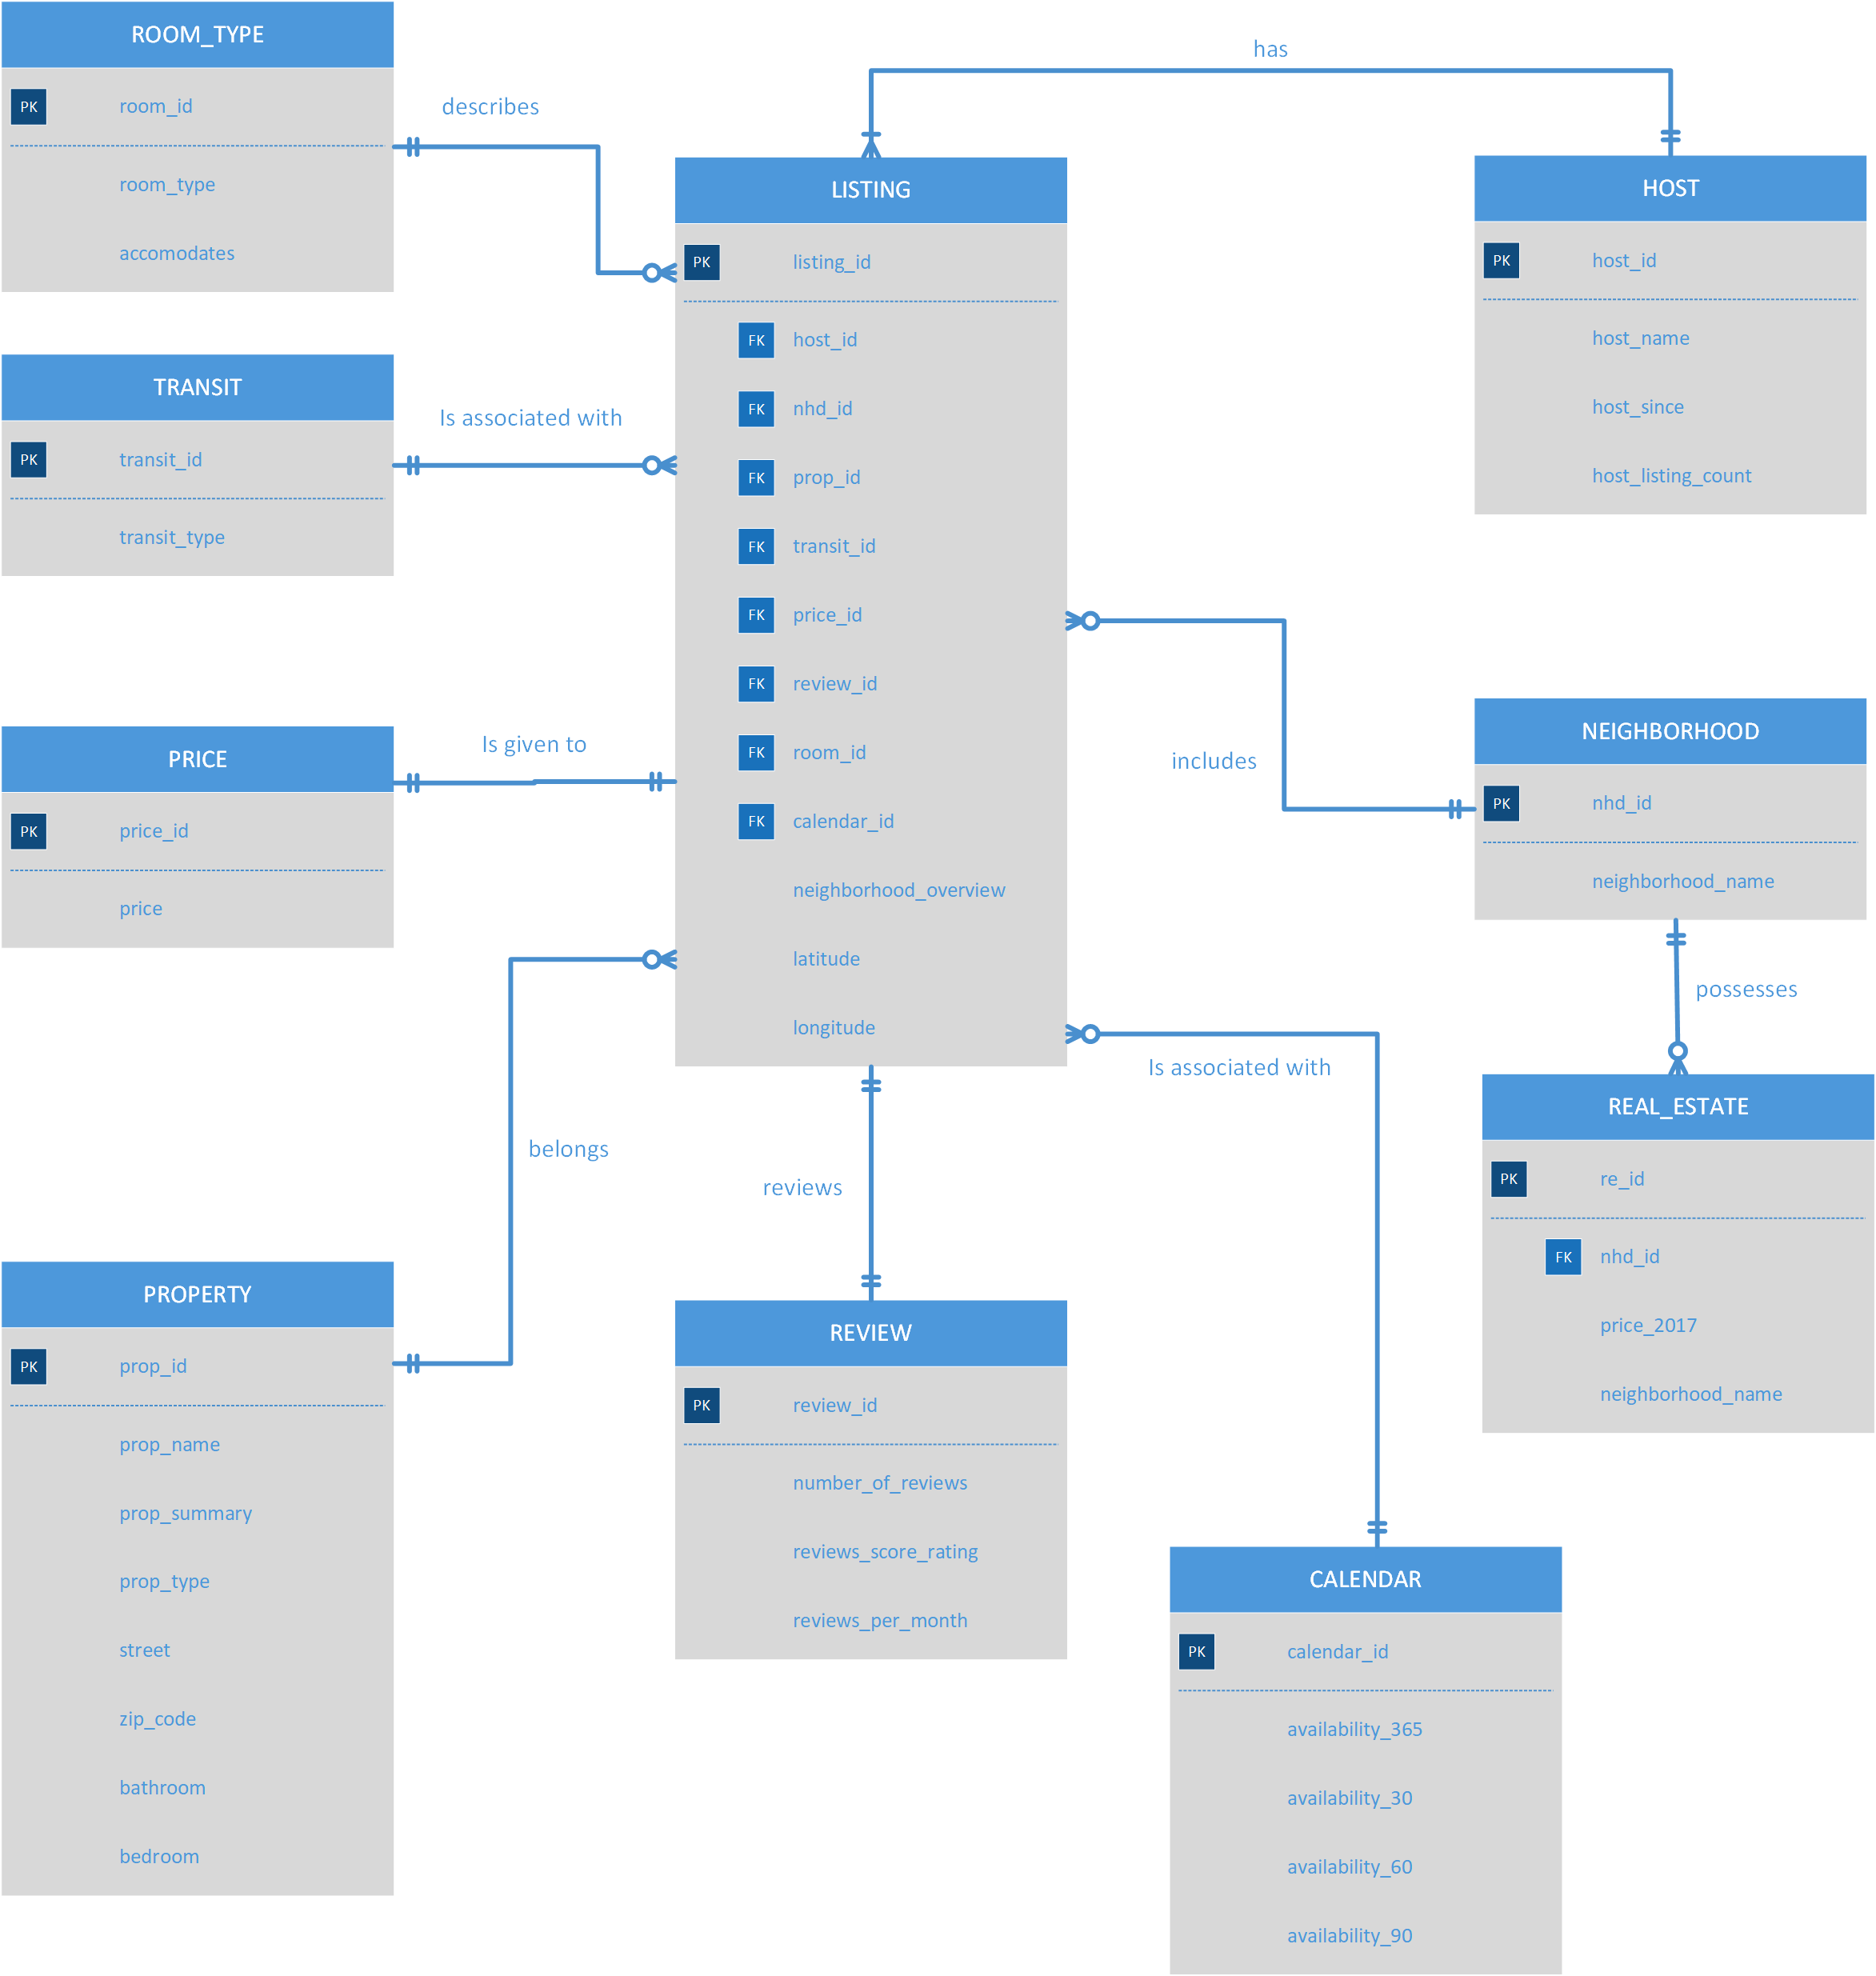

**We divided and organized our dataset into 10 different tables:**

1. Listing
   - Primary Key: listing_id
   - Foreign Key(s): host_id, nhd_id, prop_id, transit_id, price_id, review_id, room_id, calendar_id
   - Attributes: neighborhood_overview, latitude, longitude

2. Host
   - Primary Key: host_id
   - Foreign Key(s): None
   - Attributes: host_name, host_since, host_listing_count

3. Neighborhood
   - Primary Key: nhd_id
   - Foreign Key(s): None
   - Attributes: neighborhood_name

4. Real_Estate
   - Primary Key: re_id
   - Foreign Key(s): nhd_id
   - Attributes: price_2017, neighborhood_name

5. Review
   - Primary Key: review_id
   - Foreign Key(s): None
   - Attributes: number_of_reviews, reviews_score_rating, reviews_per_month

6. Property
   - Primary Key: prop_id
   - Foreign Key(s): None
   - Attributes: prop_name, prop_summary, prop_type, street, zip_code, bathroom, bedroom

7. Price
   - Primary Key: price_id
   - Foreign Key(s): None
   - Attributes: price

8. Transit
   - Primary Key: transit_id
   - Foreign Key(s): None
   - Attributes: transit_type

9. Room_Type
   - Primary Key: room_id
   - Foreign Key(s): None
   - Attributes: room_type, accommodates

10. Calendar
    - Primary Key: calendar_id
    - Foreign Key(s): None
    - Attributes: availability_365, availability_30, availability_60, availability_90

The Listing table is central to our database design. It is connected to 8 other tables in our database through foreign keys. We decided to model our schema in this structure because the original dataset from Airbnb is organized by listings of all Airbnb properties in San Francisco. 

Originally, our listing table had all the information relevant to each listing in San Francisco that was posted on the Airbnb website. Information regarding hosts, properties, availabilities, transit, prices, reviews, and neighborhoods were incorporated in the listing table. However, in an effort to reduce data redundancy and data anomalies when inserting or updating data in our database we performed normalization on our listing table. Fields related to hosts, properties, availabilities, transit, prices, reviews, and neighborhoods were removed from the listing table and organized into 8 individual tables based on the information. For example, the host table only contains data regarding the host of an Airbnb listing and the property table only contains information about the property. These 8 new tables each have their own primary keys, which are incorporated as foreign keys in the listing table to connect the data from each table back to the normalized listing table. After the normalization process, each of our tables represents a single subject and all attributes in a table is directly dependent on the primary key. 

Lastly, our real_estate table contains the average real estate prices in 2017 for each neighborhood in San Francisco only for two bedroom properties. We joined the real estate table and the listing table to the neighborhood table because our analysis is based on the comparison between real estate prices and potential income from Airbnb properties in each neighborhood in the city of San Francisco. By joining the two tables, real_estate and listing, through the neighborhood table, we can extract data from both tables specific to certain neighborhood(s).
 


## Description of the Business Problem

**Introduction:**

San Francisco has one of the world’s most inflated real estate markets in the world. For context, the year-over-year surge in price of housing had an average of around 11% for the past two decades in San Francisco, as compared to the average inflation rate of around 2.1%. This has not only made affordable housing extremely difficult for those in medium and low income neighborhoods, but also turned the City into a “City of Renters.” In fact, over 65% of the homes in the City are renter occupied, as compared to 35% which are owned. (Source: https://www.businessinsider.com/san-francisco-housing-market-is-now-commonly-seen-as-being-in-crisis-2018-7)
 
Due to the lack of affordable housing, the demand for rental properties is huge in San Francisco. This fact, combined with San Francisco’s status as a popular tourist destination, has made it a booming market for temporary accommodation services such as Airbnb.  Our case deals with a scenario where a client wishes to buy a house in San Francisco and rent it out for a specified period of time. Would such an investment yield significant returns in a housing market such as San Francisco? How many years would it take for the client to break even? Which neighborhoods are the most promising when it comes to comparing the annual income versus up-front costs? These are some of the questions we attempt to answer with our analysis
 
**Assumptions:**
- To make our analysis more focused, we are only considering two-bedroom apartments across different neighborhoods in San Francisco. Two bedrooms were chosen over other types (3 or 4 bedroom) due to their ubiquitous nature not only as a home type but also as Airbnb rentals.
- In addition, we are only considering the case whereby the client rents out properties on Airbnb as this is the main dataset we have chosen to focus on.

**Objective:** 

Our objective is to attempt to establish a correlation between real estate prices and
Average income yielded by Airbnb rentals, grouped by neighborhood. Based on our data, we aim to give a recommendation on which neighborhoods give the highest rate of return based on initial investment, by comparing sets of values. While this is a niche case for a specific platform (Airbnb), for a specific room type (2 bedroom) grouped by a specific category (neighborhood), we hope that our results will provide some insight on prudent decision making in this realm for interested investors.

**Client:**

Our client is ideally an investor with plentiful funds who is looking to gain from the booming housing prices in San Francisco, by investing in real estate and renting it out on the Airbnb platform. While the client may or may not reside in the city itself, an important caveat is that the house itself should not be occupied by the client and should be fully reserved for the benefit of the renters
 
**Parameters:**
1.     Real Estate Annual Price:
       - Annual average price for a two-bedroom in San Francisco by neighborhood
2.     Neighbourhood:
       - List of neighborhoods across which we are conducting the analysis. Note that only those neighborhoods are considered which are common in both the Airbnb and Real Estate data
       - 32 total neighborhoods are covered.
3.     Annual Income for Partial Occupancy (“Base Case”): 
       - This is assuming that the Airbnb rental is only booked for part of the year based on the average availability data given per neighborhood.
       - Computed by (Daily Average Airbnb Price Per Neighborhood) x (Average # of Occupied Days By Neighborhood)
4.     Annual Income for Full Occupancy (“Optimistic Case”):
       - Assuming the Airbnb unit is booked all year round Computed by (Daily Average Airbnb Price Per Neighborhood) x (365 Days)
 
**Note:** All the pricing information is evaluated as an aggregate(average) across each neighborhood.


# Analysis of Airbnb and Real Estate Data

## Establishing The Connection to Database

The first step is to import all the required python packages for our analysis:
* psycopg2 is used to connect to the database.
* We are using the library matplotlib for visualization.
* numpy for correlation calculation

In [3]:
! pip install psycopg2-binary
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

conn = psycopg2.connect(host="localhost", database="airbnb_investment_project", user="postgres", password="") #Add your passsword

cur = conn.cursor()

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Query to Fetch Data

The following query returns the average price of Airbnb listings based on occupancy, averaged over a year, grouped by neighborhood. It also returns the real estate price averaged over a year. Thereon, the data returned by the query is stored in the variable 'all_data'.

In [4]:
x = """
SELECT nh.neighborhood_name, AVG(re.price_2017), AVG(pr.price) as Avg_Price, Avg(cl.availability_365) as Yearly_Availability, (Avg(pr.price) * avg(365-cl.availability_365)) as Income_Year
FROM abnb.neighborhood as nh
LEFT JOIN abnb.listing as ls
on nh.nhd_id = ls.nhd_iD
INNER JOIN abnb.real_estate AS re
ON nh.nhd_id = re.nhd_id
INNER JOIN abnb.price as pr
ON ls.price_id = pr.price_id
INNER JOIN abnb.calendar as cl
ON ls.calendar_id = cl.calendar_id  
WHERE pr.price is NOT NULL
AND cl.availability_365 is NOT NULL
GROUP BY nh.neighborhood_name;
"""
#Columns (in order): Neigborhood, Real Estate Price(Annual), Daily Airbnb Price, Yearly Airbnb Availability, Partial Income ((365-Availability) x Daily Price)
#NOTE: We have NOT added a column for Full Income (that is, 365 x Daily Airbnb Price). We will do this later, and put it in a list.

cur.execute(x)

all_data = cur.fetchall()
for records in all_data:
    print(records)

#Storing all the possible data we need in list 'all_data'


('Bayview', Decimal('742616.670000000000'), Decimal('139.6666666666666667'), Decimal('186.0598290598290598'), Decimal('24991.97720797720798723133903133903134'))
('Bernal Heights', Decimal('1327308.330000000000'), Decimal('202.2276785714285714'), Decimal('138.2433035714285714'), Decimal('45856.48031927614795848284438775510204'))
('Castro/Upper Market', Decimal('1220608.330000000000'), Decimal('245.4509803921568627'), Decimal('130.3431372549019608'), Decimal('57596.75701653210302286057285659361784'))
('Crocker Amazon', Decimal('866025.000000000000'), Decimal('109.6428571428571429'), Decimal('198.5357142857142857'), Decimal('18251.61989795918368216989795918367347'))
('Diamond Heights', Decimal('875066.670000000000'), Decimal('202.5263157894736842'), Decimal('179.5263157894736842'), Decimal('37563.30193905817174533185595567867036'))
('Downtown/Civic Center', Decimal('1012883.330000000000'), Decimal('204.2243346007604563'), Decimal('118.1026615969581749'), Decimal('50422.4446500599979834589

## Analytical Visualization

We want to be able to draw a comparison between the real estate prices and the annual income through Airbnb hosting (for partial and full occupancy). In the following block, we structure the fetched data into different lists so as to be able to make and visulaize this comparison.

In [5]:
#Separating the values for each axes into different lists

neighborhood = [] 
for records in all_data:
    neighborhood.append(records[0])

#This will be our list of neighborhoods or 'markers'

RE_Price = []
for records in all_data:
    RE_Price.append(records[1])

#Real Estate price will be our x-axis 

Annual_Income_Partial_Occupancy = []
for records in all_data:
    Annual_Income_Partial_Occupancy.append(records[4])
   
 #This will be our Y-Axis for Case(A): That is, partial annual income (look above for column calculation)

Annual_Income_Full_Occupancy = []
for records in all_data:
    Annual_Income_Full_Occupancy.append(records[2]*365)
   
 #This will be our Y-Axis for Case(B): That is daily price x 365 (Fully Booked all year. Calculation made above)


## Part I, Case (A): Partial Occupancy Scatter Plot

The following block is used to draw a scatter plot that compares the average real estate price with the partial occupancy yearly income for the base case. The coordinates represent the neighborhood. It can be seen from the plot that mostly neighborhoods with high real estate prices have higher returns through Airbnb.

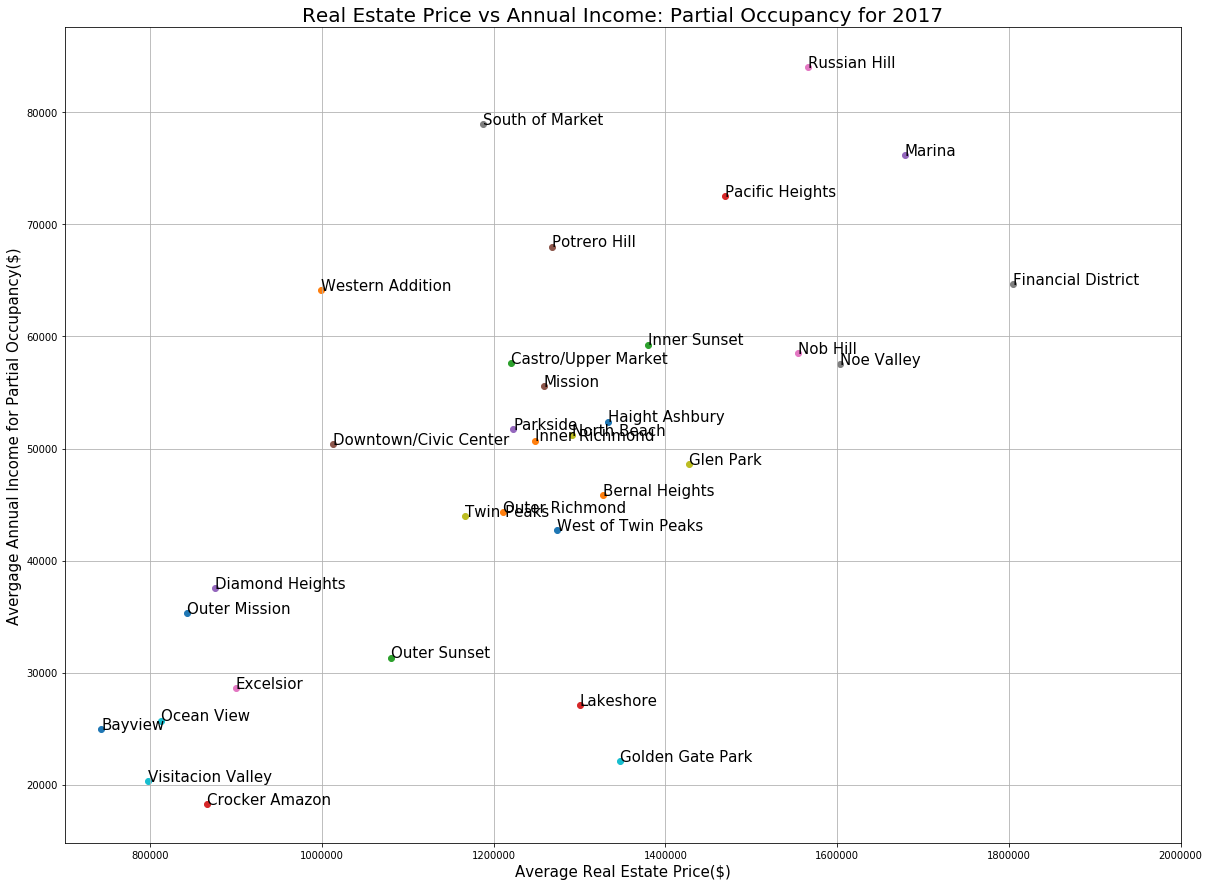

In [11]:
for i,type in enumerate(neighborhood):
    x = RE_Price[i]							#Setting X-Axis for Case(A)
    y = Annual_Income_Partial_Occupancy[i]			#Setting Y-Axis for Case(B)
    plt.scatter(x, y)						#Type of Plot is scatter
    plt.text(x , y , type, fontsize = 15)	#This combined with the enumerate function marks each label (Source: Stackoverflow)
    plt.xlim(700000, 2000000)				#Min and Max limits for X-Axis
    
plt.rcParams["figure.figsize"] = [25,15]								#Can change this to adjust size of plot. Initially it was too small.
plt.xlabel('Average Real Estate Price($)', fontsize = 15)					#Labelling X-Axis
plt.ylabel('Avergage Annual Income for Partial Occupancy($)', fontsize = 15)				#Labelling Y-Axis
plt.title('Real Estate Price vs Annual Income: Partial Occupancy for 2017', fontsize = 20)	#Chart Title
plt.grid(True)
plt.show()

## Part I, Case (B): Full Occupancy Scatter Plot
The following block is used to draw a scatter plot that compares the average real estate price with the full occupancy yearly income for 2017. The coordinates represent the neighborhood. It can be seen from the plot yearly income shares a linearly increasing relationship with real estate price.

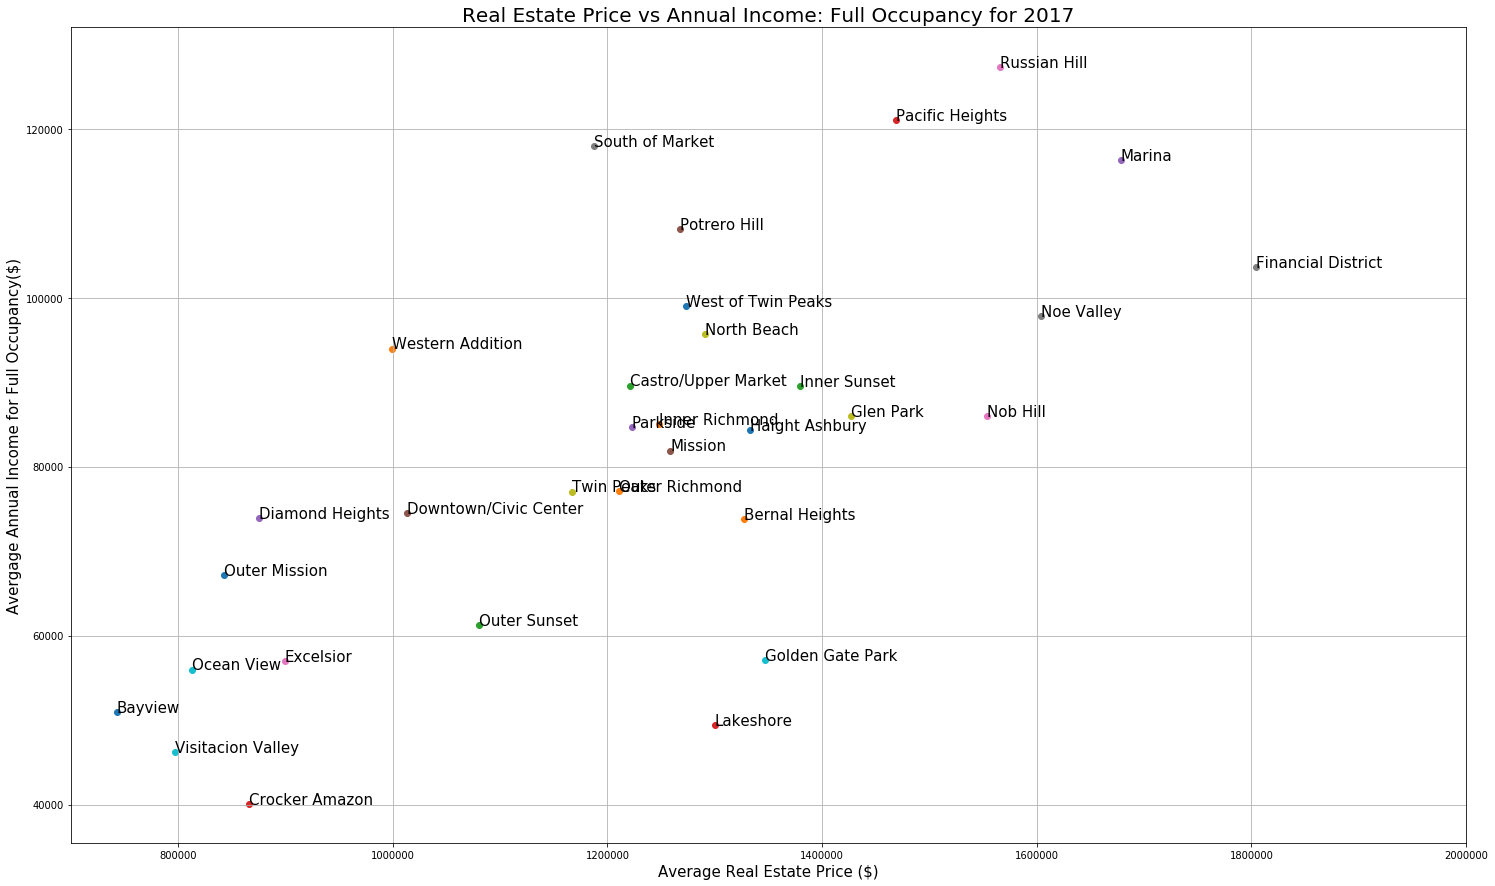

In [7]:
for i,type in enumerate(neighborhood):
    x = RE_Price[i]							#Setting X-Axis for Case(A)
    y = Annual_Income_Full_Occupancy[i]				#Setting Y-Axis for Case(B)
    plt.scatter(x, y)						#Type of Plot is scatter
    plt.text(x , y , type, fontsize = 15)	#This combined with the enumerate function marks each label (Source: Stackoverflow)
    plt.xlim(700000, 2000000)				#Min and Max limits for X-Axis
    
plt.rcParams["figure.figsize"] = [20,15]								#Can change this to adjust size of plot. Initially it was too small.
plt.xlabel('Average Real Estate Price ($)', fontsize = 15)				#Labelling X-Axis
plt.ylabel('Avergage Annual Income for Full Occupancy($)', fontsize = 15)				#Labelling Y-Axis
plt.title('Real Estate Price vs Annual Income: Full Occupancy for 2017', fontsize = 20)	#Chart Title
plt.grid(True)
plt.show()

In [8]:
RE_Price2 = []
Annual_Income_Full_Occupancy2 = []
Annual_Income_Partial_Occupancy2 = []

for x in RE_Price:
    RE_Price2.append(int(x))                        #Need to convert values to int() for correlation calculation
for y in Annual_Income_Full_Occupancy:
    Annual_Income_Full_Occupancy2.append(int(y))    #Need to convert values to int() for correlation calculation
for z in Annual_Income_Partial_Occupancy:
    Annual_Income_Partial_Occupancy2.append(int(z)) #Need to convert values to int() for correlation calculation

In [9]:
a = np.corrcoef(RE_Price2, Annual_Income_Full_Occupancy2)
b = np.corrcoef(RE_Price2, Annual_Income_Partial_Occupancy2)

print('The correlation coefficient for Case (A) is {}% and for Case (B) is {}%'.format(round(a[0][1]*100,2), round(b[0][1]*100,2)))

The correlation coefficient for Case (A) is 69.03% and for Case (B) is 67.21%


## Final Analysis and Associated Methodologies:

*Real Estate Vs Annual Income*

For the first part of our analysis, we compared the values for real estate prices against the expected annual return for each neighborhood. We also imported a correlation coefficient function from ‘numpy’ module in order to establish whether (and if so, to what extent) these two variables are correlated. While intuitively, a so-called “richer/fancier” neighborhood in San Francisco should show up as higher priced Airbnb rentals, the extent of this positive correlation maybe affected by multiple external factors, such as the proportion of thrifty to business travellers and the distance to the airport, to name a few. For instance, if a neighborhood on the upper end of the real estate spectrum is extremely far from the airport, it may make sense for the landlord to drop the price in order to attract more customers. In either case, the extent of the correlation will be vital to support any recommendation

Furthermore, we split this analysis into two parts: Part (A) or the “base case” which represented the yearly income generated as per the average occupancy rate for each neighborhood. Part (B) represented the “optimistic case” which assumed that the rental was occupied all-year round without a single day of vacancy. 
1. **Base Case:** For our base case, we found a correlation coefficient of **69.03%** which implies that there is a strong correlation between the real-estate prices and the returns from rentals. As expected, our data states that renting out Airbnb units in the so-called “richer” or “fancier” neighborhoods will yield a better return on investment, and therefore location is indeed an important consideration when investing. However, an important factor to consider here is the large variance in the ‘average occupancy’ rates (that is, number of days occupied) between neighborhoods. For instance, even though the average days a unit was occupied during the entire year was 195, it had a spread of 54. This means that the variability between incomes generated for a household booking for 249 days as compared to one booking only for 141 days could be significant. Therefore, while we feel that an average of 195 days booked across all neighborhoods is good news for investors, the risk of significant loss due to unexpectedly high vacancy rates must be considered when making a decision.
2. **Optimistic Case:** We considered a hypothetical situation whereby the unit is rented out all year without any vacancies. This represents our “best-case” scenario, where the planning, administration, marketing and logistics of the rentals are taken care of in such a manner that the unit is “hot property” with above-average demand in the Airbnb rental space. Another reason for considering this case, is to provide an estimate of the minimum number of years it would take to earn back the initial investment. For this case, our correlation coefficient came out to be **67.21%** which is not very different from Case-(A). Therefore, for all intents and purposes, this case is virtually identical to our first case when it comes to answering the question of whether “richer neighborhoods lead to richer yields.” However, as we will see in our next section, this does not mean that the return on investment is equivalent for both cases. 


## Top Ten Neighbourhoods: Return On Investment

The following block is used to plot a horizontal bar chart that depicts the top ten neighborhoods based on ROI. 

The Ten Best Neighbourhoods for Return on Investment Are:
South of Market : 	10.07 
Western Addition : 	10.63 
Potrero Hill : 	11.72 
Diamond Heights : 	11.84 
Pacific Heights : 	12.14 
Russian Hill : 	12.30 
Outer Mission : 	12.54 
West of Twin Peaks : 	12.86 
North Beach : 	13.49 
Downtown/Civic Center : 	13.59 


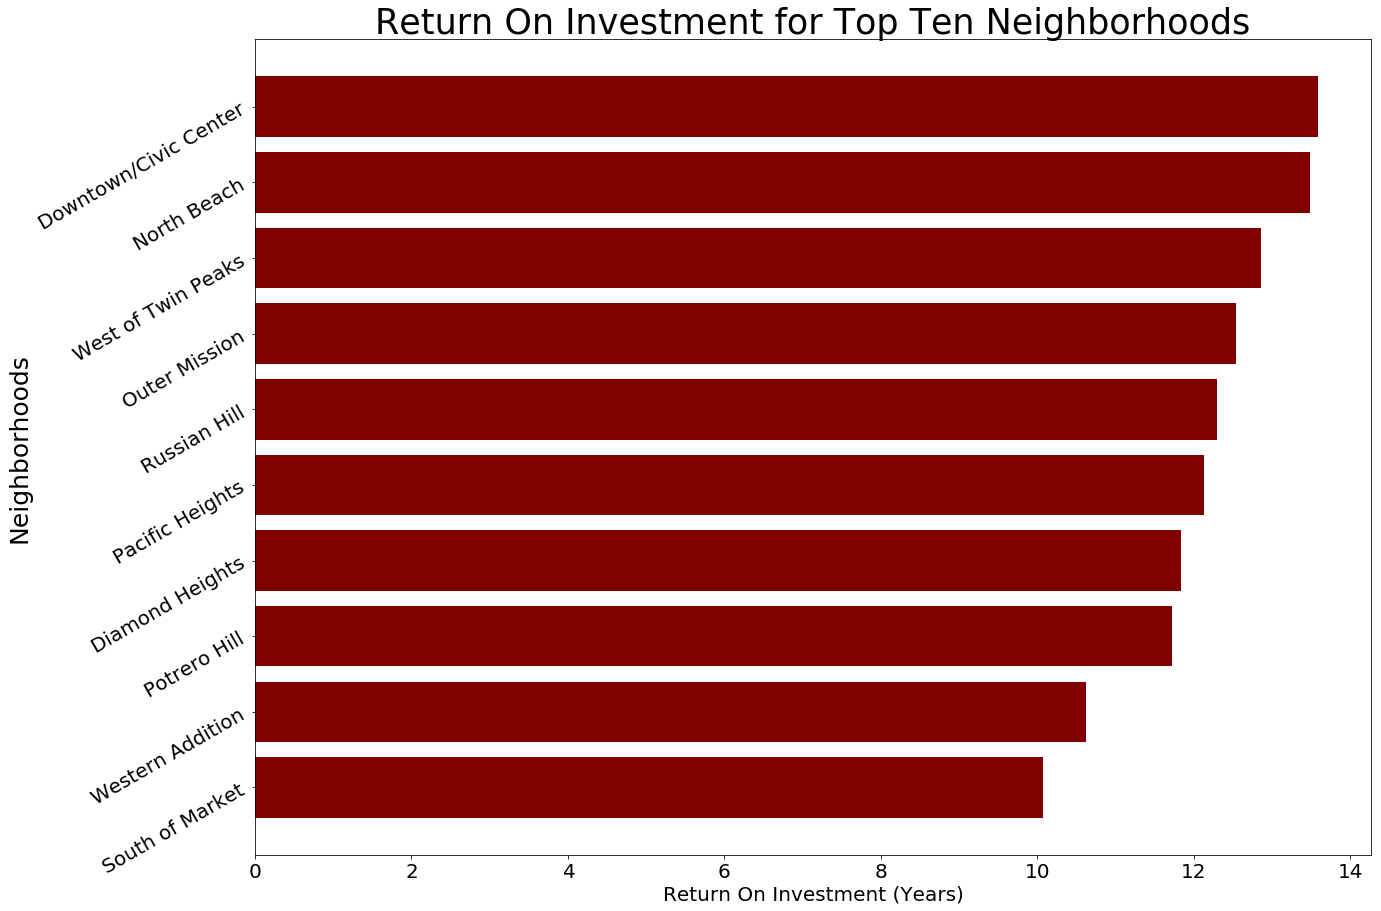

In [10]:
ROI_Full = {} 										#Creating a dictionary to get key-value pairs for ROI Values and Neighborhood for the graph later
for records in all_data:
    ROI_Full[records[1]/(records[2] * 365)] = records[0] #ROI = (Real Estate Price)/(365 x Daily Average Price)


ROI_Sorted_Desc = sorted(ROI_Full) 					#Sorting the ROI Values in Descending Order

best = []											 #List of 10 best neighborhoods 

Top_Ten = ROI_Sorted_Desc[:10]                                      #Values for Each Neighborhood for the Bar Graph Later
print ('The Ten Best Neighbourhoods for Return on Investment Are:') #Printing Out Ten Best Neighborhoods
for x in Top_Ten:
    print ("{} : \t{} ". format(ROI_Full[x], round(x,2) ))
    best.append(ROI_Full[x])                                        #Filling out Best List for the Bar Graph Later

plt.barh(best, Top_Ten, color = "Maroon") 						#Can change color 
plt.xlabel('Return On Investment (Years)', fontsize=20)
plt.ylabel('Neighborhoods', fontsize=25)
plt.yticks(fontsize = 20, rotation=30) 								#Rotation for y (neibhourhood) axis to give text an incline
plt.xticks(fontsize = 20)
plt.title('Return On Investment for Top Ten Neighborhoods', fontsize = 35)
plt.show()

## Part II: Return On Investment

*Return On Investment*

For our second part, we attempted to answer another question investors may be potentially interested in, namely “How long will it take us to get our money back and then some?” While the first part established a positive correlation between real estate prices and annual income across all neighborhoods, this part dives deeper in an attempt to find out which neighborhoods give us the best Return On Investment(ROI). For our units of measurement, we made a very rudimentary calculation by dividing the up-front average cost of real estate divided by the annual yearly income for our  “optimistic” scenario for each neighborhood. An important thing to note here is that other macroeconomic factors such as tax payments, miscellaneous expenses, loan rates etc. were NOT considered for the sake of simplicity. After calculating the respective ROIs for all 32 neighborhoods, we made a list of the top ten neighborhoods with the maximum return on investments (i.e. minimum number of years to break even according to our formula). According to our analysis, South Of Market (aka “SOMA”) came out on top, with an average of 10.07 years to break even assuming no vacancies. Some others are given above.


## Conclusion and Future Prospects:

While the data definitely shed some light on some of our initial questions (and even made a strong case for others) there are several ways we can extend our analysis to formulate a more ironclad recommendation. For example, on performing a more in-depth analysis of the top five neighborhoods in our list, we noticed the following commonalities: close proximity to eateries and tourist spots, excellent safety rating, a good walk score, and an average of three blocks to the nearest source of public transportation. In addition, most of the rentals were under the ‘Entire Home/Apartment’ category rather than being ‘Private’ or ‘Shared’. Finally, at least two out of five branded themselves as “quiet neighborhoods.” While none of these factors are conclusive (or even very surprising), it would be interesting to consider the weightage of each factor when considering further analysis. For instance, incorporating crime statistics into this data, would give us a better idea of how closely consumer choice is related to the more pricey listings in these neighborhoods. Having data on types of consumers would also help to fill in the gaps to some of the trends given above. For example, it is reasonable to assume that business travellers with more disposable income would prefer “quieter” neighborhoods, as opposed to younger renters on a budget who don’t mind busy, bustling streets. This may explain why some of the quieter neighborhoods offer some of the best return on investment. Additionally, geospatial data may allow us to measure to what extent listings in a particular neighborhood caters to tourists or casual travelers. Comparing the distances to popular tourist destinations and hot-spots, as well as other conditions such as traffic, public transportation and vehicle accessibility will help us sharpen our focus is why some neighborhoods fare better than other in our analysis. Finally,  financial considerations such as inflation rate, taxes, utility/maintenance costs, and loan rates, must be considered for our recommendation to be complete. While we have left these factors for the sake of simplicity, fluctuations in some of these values can lead to large differences in expected returns. In conclusion, while there is significant scope for expansion, we believe our analysis provides a good framework and starting point for someone looking to put his/her foot into the booming real estate market of San Francisco.

